# #Task 1

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast',
           'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']

Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
               'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']

Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
        'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:
le =LabelEncoder()
Outlook=le.fit_transform(Outlook)
Temperature=le.fit_transform(Temperature)
Humidity=le.fit_transform(Humidity)
Wind=le.fit_transform(Wind)
Play=le.fit_transform(Play)

print("Outlook : \n",Outlook)
print("\nTemperature : \n",Temperature)
print("\nHumidity : \n",Humidity)
print("\nWind : \n",Wind)
print("\nPlay : \n",Play)

features=tuple(zip(Outlook,Temperature,Humidity,Wind))
label=Play

print("\nFeatures : \n",features)
print("\nLabel : \n",label)

Outlook : 
 [1 1 0 2 2 2 0 1 1 2 1 0 0 2]

Temperature : 
 [1 1 1 2 0 0 0 2 0 2 2 2 1 2]

Humidity : 
 [0 0 0 0 1 1 1 0 1 1 1 0 1 0]

Wind : 
 [0 1 0 0 0 1 1 0 0 0 1 1 0 1]

Play : 
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]

Features : 
 ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))

Label : 
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
data_train,data_test,target_train,target_test = train_test_split(features,label,test_size=0.10,random_state=61)

gnd=GaussianNB();
gnd.fit(data_train,target_train)
predict = gnd.predict(data_test)
print("\nPrediction : ",predict)
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,predict))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,predict) )
print("\nPrecision score : ",precision_score(target_test,predict))
print("\nRecall score : ",recall_score(target_test,predict))


Prediction :  [1 1]

Acccuracy Score :  1.0

Confusion Matrix : 
 [[2]]

Precision score :  1.0

Recall score :  1.0


In [5]:
gnd=GaussianNB();
gnd.fit(features,label)

print("\nPrediction(Outlook is 'Rainy', Temperature is 'Mild', Humidity ='Normal',Wind = 'False') : ",gnd.predict([[1,2,1,0]]))

print("\nPrediction(Outlook is 'Sunny', Temeprature is 'Cool', Humidity = 'High', Wind = 'True') :  ",gnd.predict([[2,0,0,1]]))


Prediction(Outlook is 'Rainy', Temperature is 'Mild', Humidity ='Normal',Wind = 'False') :  [1]

Prediction(Outlook is 'Sunny', Temeprature is 'Cool', Humidity = 'High', Wind = 'True') :   [0]


# Using Decision Tree 

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
data_train,data_test,target_train,target_test = train_test_split(features,label,test_size=0.10,random_state=61)

clf=DecisionTreeClassifier(criterion="entropy",random_state=61)
clf.fit(data_train,target_train)

#1
pred1=clf.predict([[1,2,1,0],[2,0,0,1]])
print("\nPrediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') : ",pred1[0])
print("\nPrediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) : ",pred1[1])
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,pred1))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,pred1) )
print("\nPrecision score : ",precision_score(target_test,pred1))
print("\nRecall score : ",recall_score(target_test,pred1))


pred = clf.predict(data_test)
print("\nPrediction : ",pred)
print("\nAcccuracy Score : ",metrics.accuracy_score(target_test,pred))
print("\nConfusion Matrix : \n",confusion_matrix(target_test,pred) )
print("\nPrecision score : ",precision_score(target_test,pred))
print("\nRecall score : ",recall_score(target_test,pred))


Prediction(Outlook is ’Rainy’, Temperature is ’Mild’, Humidity ='Normal',Wind = 'False') :  1

Prediction(Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity = ’High’, Wind = ’True’) :  0

Acccuracy Score :  0.5

Confusion Matrix : 
 [[0 0]
 [1 1]]

Precision score :  1.0

Recall score :  0.5

Prediction :  [1 1]

Acccuracy Score :  1.0

Confusion Matrix : 
 [[2]]

Precision score :  1.0

Recall score :  1.0


[Text(558.0, 978.48, 'outlook <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]\nclass = play_yes'),
 Text(418.5, 761.0400000000001, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = play_yes'),
 Text(697.5, 761.0400000000001, 'humidity <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = play_no'),
 Text(279.0, 543.6, 'outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = play_no'),
 Text(139.5, 326.1600000000001, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = play_no'),
 Text(418.5, 326.1600000000001, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = play_no'),
 Text(279.0, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = play_yes'),
 Text(558.0, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = play_no'),
 Text(1116.0, 543.6, 'temperature <= 1.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = play_yes'),
 Text(976.5, 326.1600000000001, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\n

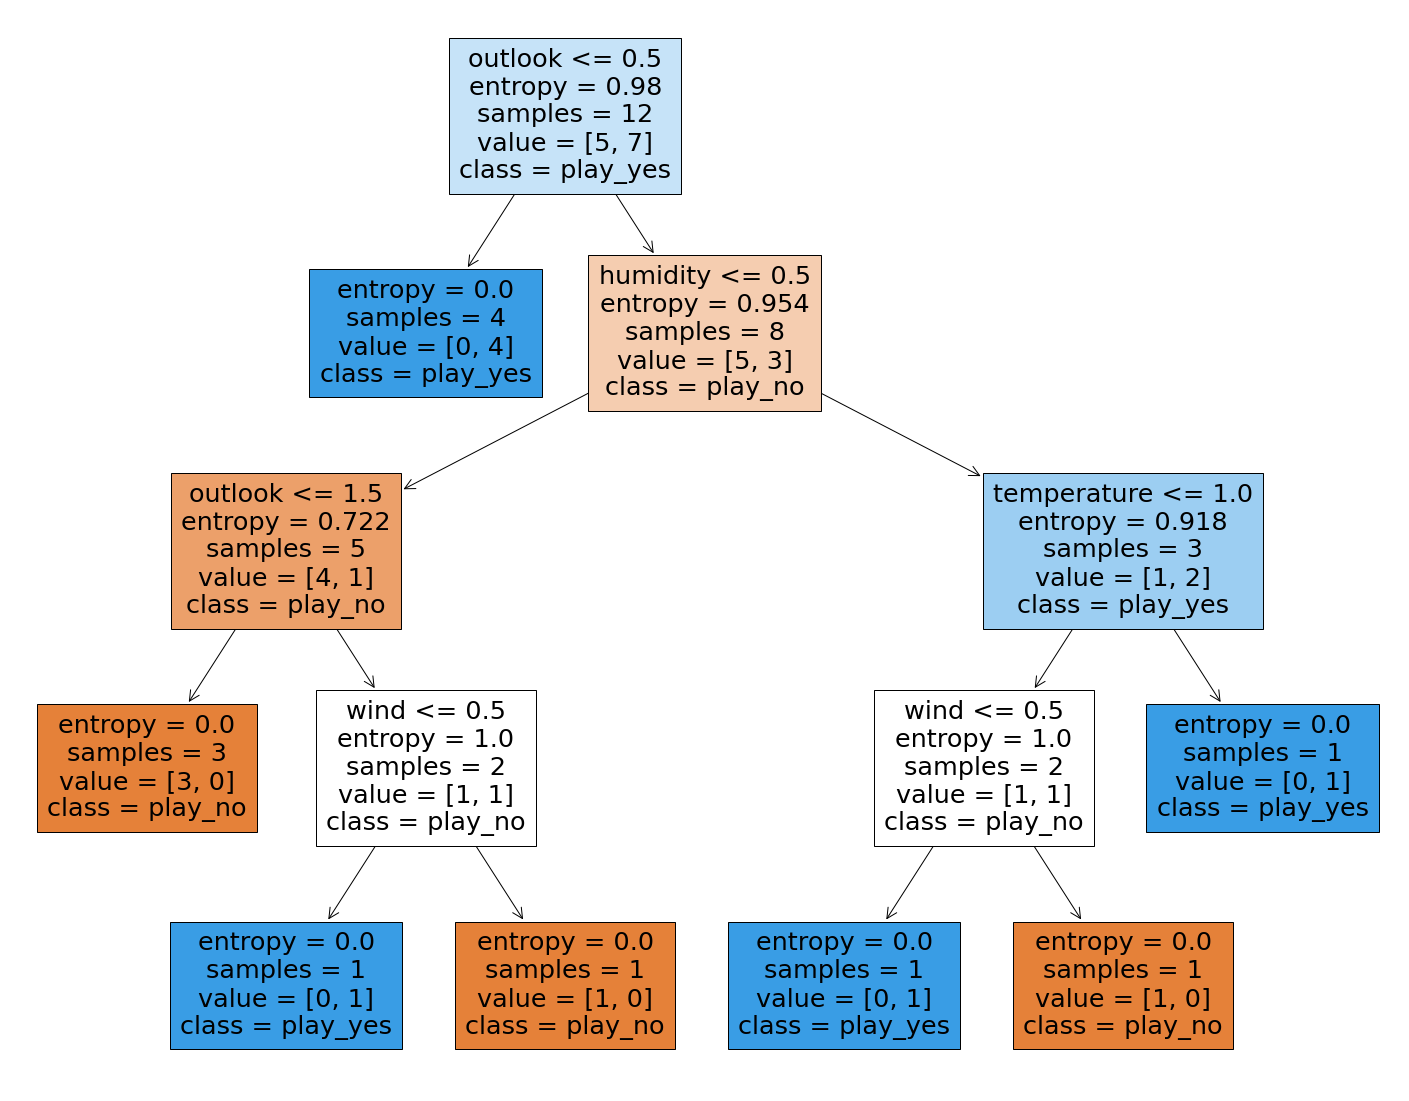

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'],filled=True)

In [9]:
fig.savefig("decision_tree_1.png")

In [21]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt

In [28]:
#Task 1: Try the algo on Same Weather dataset - OneHotEncoding of features: and Train test Division 70%-30%

#Combinig weather and temp into single listof tuples
wether_features=tuple(zip(Outlook,Temperature,Humidity,Wind))
oneHotEncode=preprocessing.OneHotEncoder()
encoded_weather_feature=oneHotEncode.fit_transform(wether_features).toarray()
print(wether_features)

print(encoded_weather_feature)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]]


In [29]:
#Train test split 70-30%
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(encoded_weather_feature,Play_encoded, test_size = 0.30, random_state = 100)

#Train Model
clf_gini_weather=DecisionTreeClassifier(criterion="gini",random_state=100)
clf_gini_weather.fit(x_train_w,y_train_w)

DecisionTreeClassifier(random_state=100)

In [30]:
# Predict usign model
y_pred_w=clf_gini_weather.predict(x_test_w)
print("Y Actual:    ",y_test_w)
print("Y Predicted: ",y_pred_w)

Y Actual:     [1 1 0 0 1]
Y Predicted:  [0 1 1 0 1]


In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test_w,y_pred_w))
print("Confusion Matrix:\n ",confusion_matrix(y_test_w,y_pred_w))

Accuracy:  0.6
Confusion Matrix:
  [[1 1]
 [1 2]]


[Text(223.20000000000002, 190.26, 'X[7] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(167.4, 135.9, 'X[1] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(111.60000000000001, 81.53999999999999, 'X[8] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

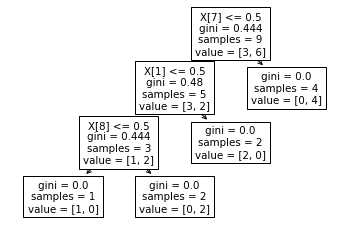

In [32]:
#Create Tree
tree.plot_tree(clf_gini_weather)